In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("leetcode_dataset - lc.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

- Swap difficulty to 0 1 and 2
- related topics (one hot encoding)
  - seeing the relationship between topic and difficulty (coorolation coefficient)
- Dropping all the non useful data
- creating the github

In [ ]:
data.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [ ]:
data = data[data['related_topics'].notna()]
data.loc[:,'related_topics'] = data['related_topics'].apply(lambda tags: tags.split(','))

<ipython-input-152-2501031b0a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'related_topics'] = data['related_topics'].apply(lambda tags: tags.split(','))


In [ ]:
topics= set()
for arr in (data.related_topics):
  for topic in arr:
    topics.add(topic)
len(topics)

0


In [ ]:
#ignore
# topicsAndDifficulty = pd.DataFrame(columns = list(topics), dtype=int)
for label, problem in data.items():
  tags = pd.Series(data=np.zeros(len(topics)), index=list(topics), dtype = int)
  difficutly = 0
  # if problem.difficulty == 'Medium':
  #   difficutly = 1
  # elif problem.difficulty == 'Hard':
  #   difficutly = 2
  # for topic in problem.related_topics:
  #   topicsAndDifficulty[topic] = difficutly

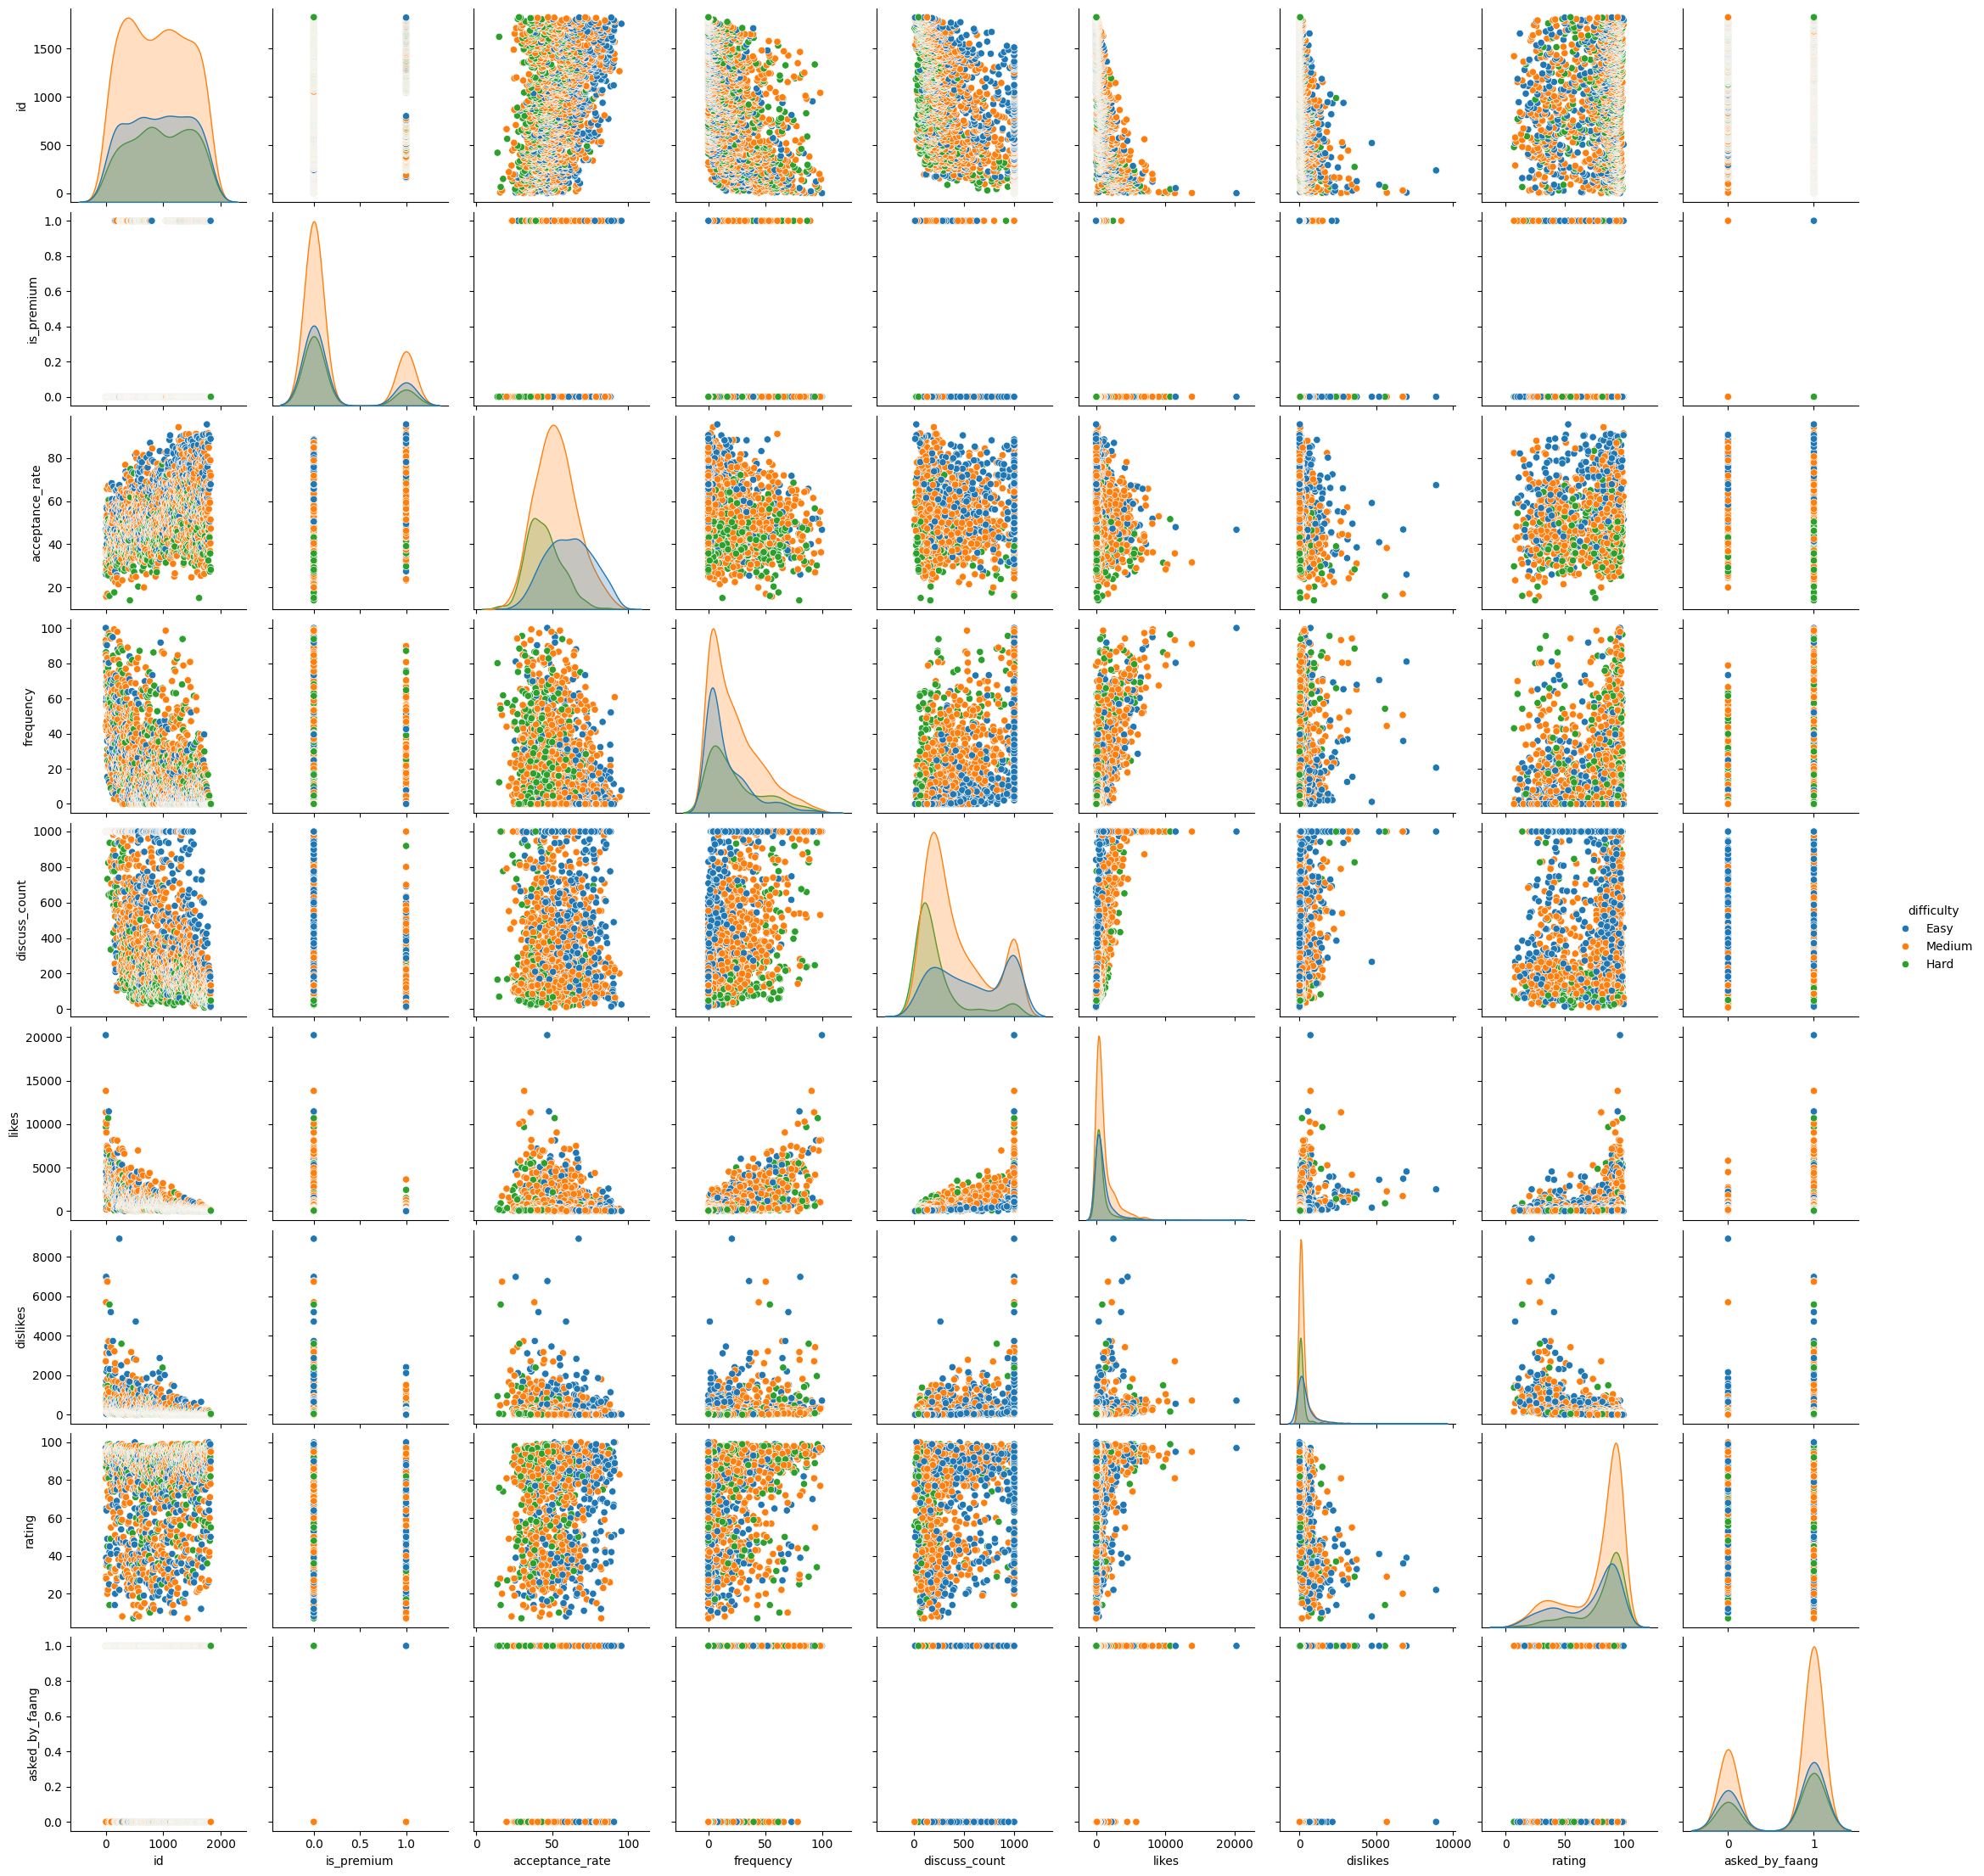

In [ ]:
sns.pairplot(data, hue="difficulty")